In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import fbeta_score, confusion_matrix
import model_utils 
from sklearn.externals import joblib
from sklearn.model_selection import KFold
import shap
from sklearn.externals import joblib

# Pretty display for notebooks
%matplotlib inline
#pd.set_option('display.max_colwidth', -1)

dataset, features, labels = model_utils.getDataSet("datasets/dataset_validation.csv")

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,0.347848,0.401902,4.364364e-01,0.33984,6.256256e-01,0.793293,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.638138,0
1,0.230731,1.000000,9.704705e-01,0.33984,6.256256e-01,0.242242,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.150150,0.237738,1.000000,0.625626,9.999999e-01,1.000000,5.915916e-01,0.357357,0
2,0.129630,0.401902,1.000000e-07,1.00000,1.000000e-07,0.214214,0.379880,1.000000e-07,0.45045,1.0,...,0.273774,0.038038,0.181181,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.357357,0
3,0.848599,1.000000,4.364364e-01,0.33984,6.256256e-01,0.789289,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,1.000000e-07,0.222222,1.000000e-07,0.638138,0
4,0.793794,0.148649,1.000000e-07,0.33984,1.000000e-07,0.299800,0.785786,9.919920e-01,1.00000,1.0,...,0.959960,0.860861,0.247247,0.023023,0.038539,9.999999e-01,0.017017,5.915916e-01,1.000000,0


# Validation for models trained with full dataset

### RandomForestClassifier

F-score on validation data: 0.7923


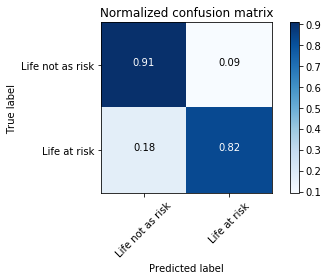

In [16]:
rfClassifier = model_utils.modelValidation('rfClassifier.joblib', features, labels)

rfcExplainer = shap.TreeExplainer(rfClassifier)
rfValues = rfcExplainer.shap_values(features)
shap.force_plot(rfcExplainer_reduced.expected_value[0], rfValues[0][0,:], features.iloc[0,:])


In [ ]:
shap.force_plot(rfcExplainer.expected_value[0], rfValues[0], features)

/anaconda2/lib/python2.7/site-packages/shap/plots/force.py:108: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


### AdaBoostClassifier

F-score on validation data: 0.7923


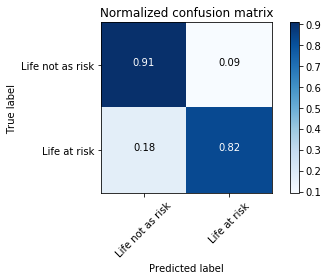

In [3]:
adaClassifier = model_utils.modelValidation('adaClassifier.joblib', features, labels)

### Stacking with two best classifiers

F-score on validation data: 0.7231


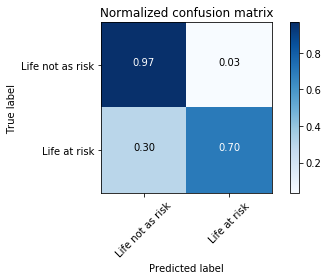

In [4]:
sclf = model_utils.modelValidation('sclf.joblib', features, labels)

### Stacking with all classifiers

F-score on validation data: 0.7216


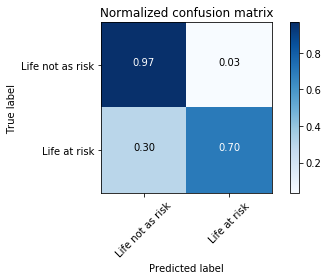

In [5]:
sclf2 = model_utils.modelValidation('sclf2.joblib', features, labels)

### RandomOverSampler

F-score on validation data: 0.7909


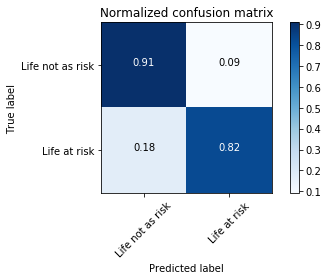

In [6]:
clfRFC = model_utils.modelValidation('clfRFC.joblib', features, labels)

# Validation for models trained with reduced dataset

### RandomForestClassifier

F-score on validation data: 0.7840


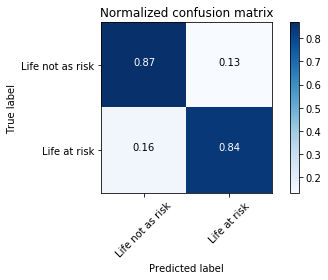

In [15]:
rfClassifier_reduced = model_utils.modelValidation('rfClassifier_reduced.joblib', features, labels)

rfcExplainer_reduced = shap.TreeExplainer(rfClassifier_reduced)
rfValues = rfcExplainer_reduced.shap_values(features)
shap.force_plot(rfcExplainer_reduced.expected_value[0], rfValues[0][0,:], features.iloc[0,:])



### AdaBoostClassifier

F-score on validation data: 0.7840


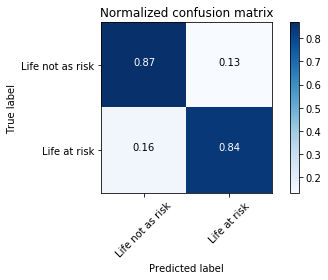

In [11]:
adaClassifier_reduced = model_utils.modelValidation('adaClassifier_reduced.joblib', features, labels)

### Stacking with two best classifiers

F-score on validation data: 0.7267


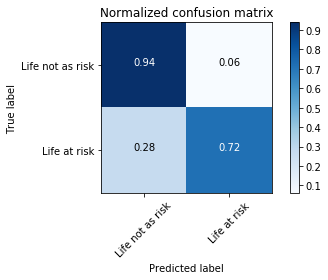

In [12]:
sclfb_reduced = model_utils.modelValidation('sclfb_reduced.joblib', features, labels)

### Stacking with all classifiers

F-score on validation data: 0.7269


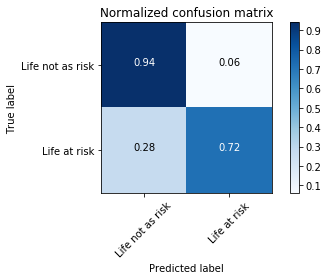

In [13]:
sclf2_reduced = model_utils.modelValidation('sclf2_reduced.joblib', features, labels)

### RandomOverSampler

F-score on validation data: 0.7852


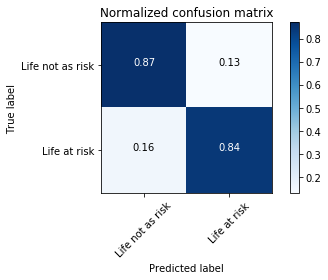

In [14]:
clfRFC_reduced = model_utils.modelValidation('clfRFC_reduced.joblib', features, labels)